<a href="https://colab.research.google.com/github/mohamedmajdi/image-processing-from-scratch/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mohamed Magdy Abdelsatar

**Gaussian blur filter from scratch**

Gaussian function is :


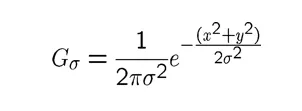

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#implementing gaussian blur from scratch
def gaussian_blur(image, kernel_size, sigma):
    #compute the gaussian kernal
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel =kernel/ np.sum(kernel)
    channels=image.shape[2]
    img_with_padding = np.zeros((image.shape[0] + kernel_size//2 * 2, image.shape[1] + kernel_size//2 * 2, channels))
    padding_per_side=kernel_size//2
    img_with_padding = np.pad(image, ((padding_per_side, padding_per_side), (padding_per_side, padding_per_side), (0, 0)), mode='constant')
    output = np.zeros_like(image)
    # Apply the Gaussian Blur Filter to each color channel separately using convolution
    for channel in range(image.shape[2]):
        for i in range(padding_per_side, image.shape[0] + padding_per_side):
            for j in range(padding_per_side, image.shape[1] + padding_per_side):
                window = img_with_padding[i - padding_per_side:i + padding_per_side + 1, j - padding_per_side:j + padding_per_side + 1, channel]
                output[i - padding_per_side, j - padding_per_side, channel] = np.sum(np.multiply(window, kernel))
    return output

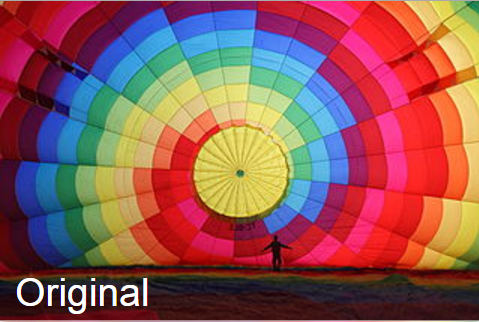

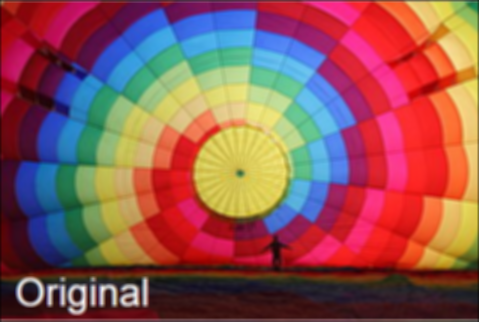

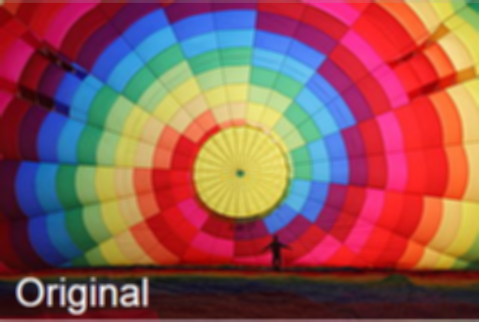

In [ ]:
# Load the example RGB image
example_image = cv2.imread("/content/pic.png", cv2.IMREAD_COLOR)
# Apply the Gaussian Blur Filter from scratch to the RGB image
gaussian_blur_result = gaussian_blur(example_image, kernel_size=5, sigma=4.0)
# Apply the Gaussian Blur Filter using cv2.GaussianBlur() to the RGB image
cv2_gaussian_blur_result = cv2.GaussianBlur(example_image, (5, 5), 4.0)
# Compare the results
cv2_imshow(example_image)
cv2_imshow(gaussian_blur_result)
cv2_imshow(cv2_gaussian_blur_result)

Key differences between the built-in function and the implementation from scratch:


1.   Padding problems: without handling the boundaries before applying the kernal to the image, there would be a black border in the output image. This problem is solved by adding a padding equal to the (kernal size // 2) in all sides.
2.   Difference in the overall intensity level of the image



**Histogram Equalization From scratch**

In [ ]:
def histogram_equalization(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    equalized_image=cdf_normalized[image.flatten()]
    equalized_image=np.reshape(equalized_image, image.shape)
    return equalized_image.astype(np.uint8)

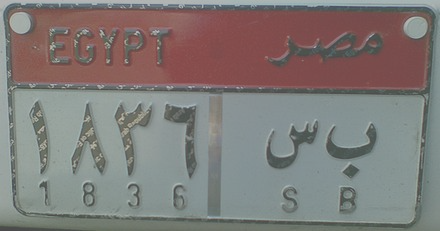

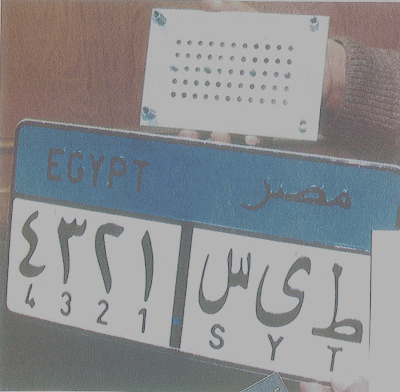

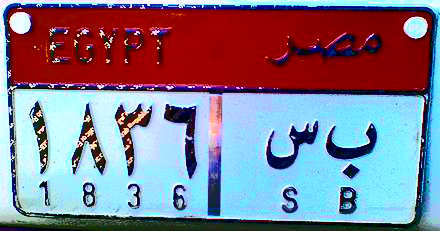

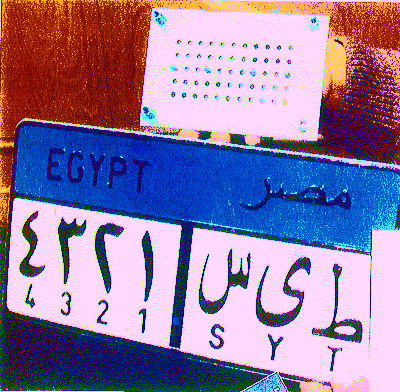

In [ ]:
distorted_image1 = cv2.imread("/content/image-1.png",cv2.IMREAD_COLOR)
cv2_imshow(distorted_image1)
distorted_image1 = cv2.cvtColor(distorted_image1, cv2.COLOR_BGR2YUV)
distorted_image2 = cv2.imread("/content/image-2.png",cv2.IMREAD_COLOR)
cv2_imshow(distorted_image2)
distorted_image2 = cv2.cvtColor(distorted_image2, cv2.COLOR_BGR2YUV)

equalized_image_1 = histogram_equalization(distorted_image1)
result1 = cv2.cvtColor(equalized_image_1, cv2.COLOR_YUV2BGR)
equalized_image_2 = histogram_equalization(distorted_image2)
result2 = cv2.cvtColor(equalized_image_2, cv2.COLOR_YUV2BGR)
cv2_imshow(result1)
cv2_imshow(result2)

**Basic thresholding & morphology operations**

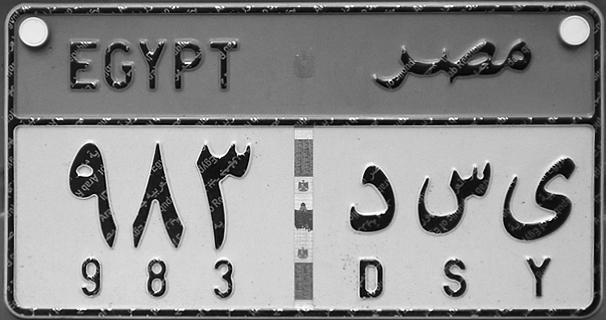

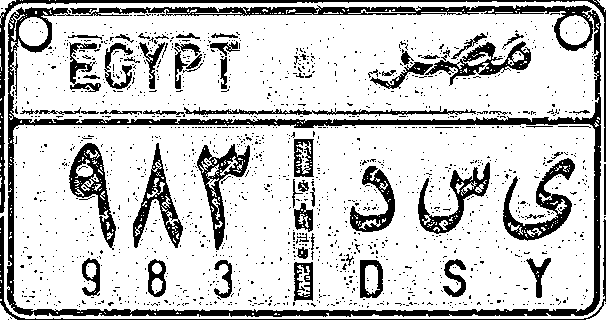

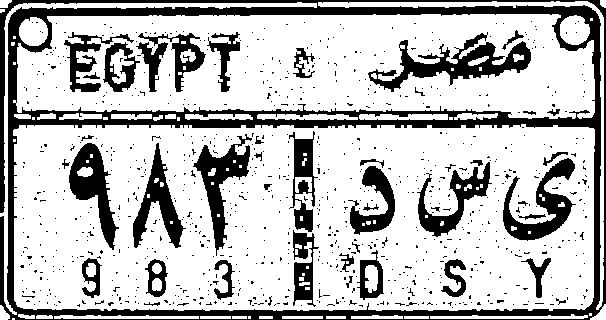

In [ ]:
license_plate_image = cv2.imread("/content/image-3.jpeg", cv2.IMREAD_GRAYSCALE)
binary_image = cv2.adaptiveThreshold(license_plate_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 4)
kernel = np.ones((3, 3), np.uint8)
morphology_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)

cv2_imshow(license_plate_image)
cv2_imshow(binary_image)
cv2_imshow(morphology_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


**References**


*   https://nishatlea.medium.com/finding-out-the-values-of-a-gaussian-kernel-in-image-processing-9caaf213b4ab
*  https://medium.com/@sabribarac/implementing-image-processing-kernels-from-scratch-using-convolution-in-python-4e966e9aafaf
*   https://towardsdatascience.com/tensorflow-for-computer-vision-how-to-implement-convolutions-from-scratch-in-python-609158c24f82
*   https://medium.com/@rohit-krishna/coding-gaussian-blur-operation-from-scratch-in-python-f5a9af0a0c0f
*   https://medium.com/geekculture/histogram-equalisation-from-scratch-271720924cc






